In [1]:
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


Using TensorFlow backend.
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type

(60000, 784)
(10000, 784)


In [2]:
import keras
from keras import layers

encoding_dim = 32  # Size of our encoded representations 

input_img = keras.Input(shape=(x_train.shape[1],))                   # Input image
encoded = layers.Dense(32, activation='relu')(input_img)   # "encoded" is encoded representation of  input
decoded = layers.Dense(784, activation='sigmoid')(encoded)           # "decoded" is lossy reconstruction of  input
autoencoder = keras.Model(input_img, decoded)                        # This model maps an input to its reconstruction

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary(0)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [30]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True,
                validation_data=(x_test, x_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.4155 - val_loss: 0.3465
Epoch 2/50
60000/60000 [==============================] - 4s 73us/step - loss: 0.3304 - val_loss: 0.3216
Epoch 3/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.3128 - val_loss: 0.3089
Epoch 4/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.3027 - val_loss: 0.3012
Epoch 5/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.2962 - val_loss: 0.2960
Epoch 6/50
60000/60000 [==============================] - 3s 53us/step - loss: 0.2924 - val_loss: 0.2933
Epoch 7/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.2901 - val_loss: 0.2913
Epoch 8/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.2885 - val_loss: 0.2900
Epoch 9/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.2875 - val_loss: 0.2892
Epoch

First row is orignal images


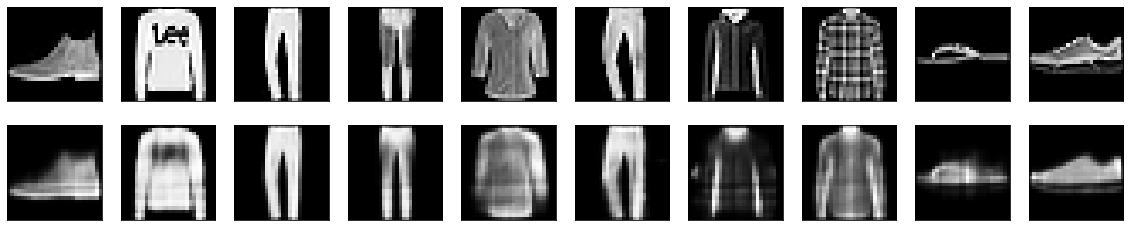

Second row is reconstrcuted images


In [31]:
encoder = keras.Model(input_img, encoded)            # This model maps an input to its encoded representation
encoded_input = keras.Input(shape=(encoding_dim,))   # This is our encoded (32-dimensional) input

decoder = keras.Model(encoded_input, decoder_layer(encoded_input))  # Create the decoder model
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

print('First row is orignal images')
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
print('Second row is reconstrcuted images')

Encoded representations


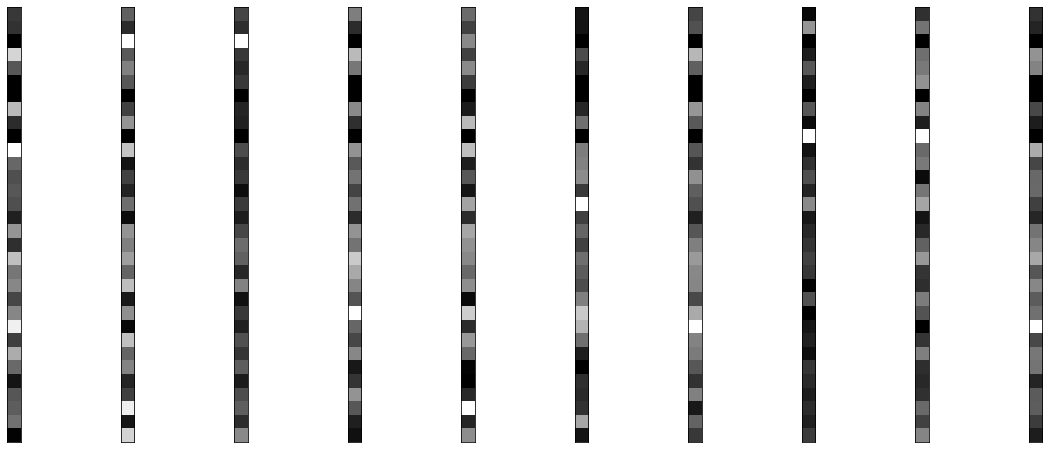

In [34]:
encoder = keras.Model(input_img, encoded)           # This model maps an input to its encoded representation
encoded_imgs = encoder.predict(x_test)              # This is our encoded (32-dimensional) input

print('Encoded representations')
n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((1, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
